<a href="https://colab.research.google.com/github/Pawan2905/ML_Project/blob/master/social_computiong_topic_modelling_with_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
# cd /content/drive/MyDrive/VIZ_ASSIGN/social_computing/input

/content/drive/MyDrive/VIZ_ASSIGN/social_computing/input


In [ ]:
ls

Project_Report_Template.doc  Toxicity_Agriculture_Project_Data_1.csv


In [39]:
# df = pd.read_csv("Toxicity_Agriculture_Project_Data_1.csv")

In [4]:
import os
import tweepy as tw
import pandas as pd
import json
import csv
import re
from textblob import TextBlob
import string
import time

# Oauth keys
consumer_key= 'M8OMSiLrxqn0aeOA83YSq6x96'
consumer_secret= 'NI1r0jY8Qz5nV7UbfmWn50ZOrReKaPjWPL371JrodhYteWdWby'
access_token= '1574985618588925952-xSfe69rGEpYPJ5yeWwhs64hoSy4Zg8'
access_token_secret= 'TYWGLHj3YLvyg4BcFsCMVjmdn6au9gAKySlm8ivp2Nv1O'

# Authentication with Twitter
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

def scraptweets(search_words, date_since, numTweets, numRuns):

    db_tweets = pd.DataFrame(columns = ['username', 'acctdesc', 'location', 'following',
                                        'followers', 'totaltweets', 'usercreatedts', 'tweetcreatedts',
                                        'retweetcount', 'text', 'hashtags']
                                )
   
    program_start = time.time()
    
    for i in range(0, numRuns):
        start_run = time.time()
        tweets = tw.Cursor(api.search, q=search_words, lang="en", since=date_since, tweet_mode='extended').items(numTweets)
        tweet_list = [tweet for tweet in tweets]

        noTweets = 0
    
        for tweet in tweet_list:
            username = tweet.user.screen_name
            acctdesc = tweet.user.description
            location = tweet.user.location
            following = tweet.user.friends_count
            followers = tweet.user.followers_count
            totaltweets = tweet.user.statuses_count
            usercreatedts = tweet.user.created_at
            tweetcreatedts = tweet.created_at
            retweetcount = tweet.retweet_count
            hashtags = tweet.entities['hashtags']
            
            try:
                text = tweet.retweeted_status.full_text
            
            except AttributeError:
                text = tweet.full_text
# Add the 11 variables to the empty list - ith_tweet:
            
            ith_tweet = [username, acctdesc, location, following, followers, totaltweets,
                         usercreatedts, tweetcreatedts, retweetcount, text, hashtags]
# Append to dataframe - db_tweets
            db_tweets.loc[len(db_tweets)] = ith_tweet
# increase counter - noTweets  
            noTweets += 1
        
        # Run ended:
        end_run = time.time()
        duration_run = round((end_run-start_run)/60, 2)
        
        print('no. of tweets scraped for run {} is {}'.format(i + 1, noTweets))
        print('time take for {} run to complete is {} mins'.format(i+1, duration_run))
        
        time.sleep(1) #15 minute sleep time

# Once all runs have completed, save them to a single csv file:
    from datetime import datetime
    
    # Obtain timestamp in a readable format
    to_csv_timestamp = datetime.today().strftime('%Y%m%d_%H%M%S')

# Define working path and filename
    path = os.getcwd()
    filename = path + '/sample_data/' + to_csv_timestamp + '_inflation_tweets.csv'
    
# Store dataframe in csv with creation date timestamp
    db_tweets.to_csv(filename, index = False)
    
    program_end = time.time()
    print('Scraping has completed!')
    print('Total time taken to scrap is {} minutes.'.format(round(program_end - program_start)/60, 2))


# Initialise these variables:
search_words = "#recession OR #firing OR #employees OR #inflation" # relevant words to COVID-19
date_since = "2019-12-31" # COVID-19 start date
numTweets = 5000 # number of tweets
numRuns = 1

# Call the function scraptweets
scraptweets(search_words, date_since, numTweets, numRuns)

no. of tweets scraped for run 1 is 5000
time take for 1 run to complete is 30.58 mins
Scraping has completed!
Total time taken to scrap is 30.6 minutes.


In [5]:
ls

sample_data/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import json

In [2]:
df = pd.read_csv("/content/drive/MyDrive/VIZ_ASSIGN/social_computing/input/20221126_032602_inflation_tweets.csv")

In [3]:
df.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,zuleimamorgado,Senior Researcher #ActuallyAutistic #immigrant...,"London, England",875,484,2300,2017-02-08 17:05:01,2022-11-26 02:54:37,0,"70,000 #university #staff in the #UK have begu...","[{'text': 'university', 'indices': [7, 18]}, {..."
1,steelballa,It's me,NaN,110,37,335,2022-03-21 23:49:58,2022-11-26 02:52:17,0,Worried about #inflation ? Fuck the #Feds. Gam...,"[{'text': 'inflation', 'indices': [14, 24]}, {..."
2,Toronto_Bot,I don't understand Toronto.,NaN,1,444,127563,2016-10-24 22:08:19,2022-11-26 02:52:11,1,Woodgreen Tenants' Association: #Ontario's Lan...,"[{'text': 'Ontario', 'indices': [53, 61]}, {'t..."
3,Toronto_Bot,I don't understand Toronto.,NaN,1,444,127563,2016-10-24 22:08:19,2022-11-26 02:52:04,1,Woodgreen Tenants' Association: #Op-Ed: John T...,"[{'text': 'Op', 'indices': [53, 56]}, {'text':..."
4,Toronto_Bot,I don't understand Toronto.,NaN,1,444,127563,2016-10-24 22:08:19,2022-11-26 02:52:01,1,Woodgreen Tenants' Association: #EXECUTIVE COM...,"[{'text': 'EXECUTIVE', 'indices': [53, 63]}, {..."


In [4]:
df.isnull().sum()

username             0
acctdesc           492
location          1532
following            0
followers            0
totaltweets          0
usercreatedts        0
tweetcreatedts       0
retweetcount         0
text                 0
hashtags             0
dtype: int64

In [5]:
tags = []
for indx in range(len(df)):
  a = df['hashtags'][indx].replace("'", "\"")
  d = json.loads(a)
  taglist = []
  for tagid in range(len(d)):
    taglist.append(d[tagid]['text'])
  tags.append(taglist)

In [6]:
len(tags)

5000

In [7]:
df['Hashtags'] = tags

In [8]:
df.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,Hashtags
0,zuleimamorgado,Senior Researcher #ActuallyAutistic #immigrant...,"London, England",875,484,2300,2017-02-08 17:05:01,2022-11-26 02:54:37,0,"70,000 #university #staff in the #UK have begu...","[{'text': 'university', 'indices': [7, 18]}, {...","[university, staff, UK, strike, pay, inflation..."
1,steelballa,It's me,NaN,110,37,335,2022-03-21 23:49:58,2022-11-26 02:52:17,0,Worried about #inflation ? Fuck the #Feds. Gam...,"[{'text': 'inflation', 'indices': [14, 24]}, {...","[inflation, Feds, cash, arbitrum]"
2,Toronto_Bot,I don't understand Toronto.,NaN,1,444,127563,2016-10-24 22:08:19,2022-11-26 02:52:11,1,Woodgreen Tenants' Association: #Ontario's Lan...,"[{'text': 'Ontario', 'indices': [53, 61]}, {'t...","[Ontario, Tenant]"
3,Toronto_Bot,I don't understand Toronto.,NaN,1,444,127563,2016-10-24 22:08:19,2022-11-26 02:52:04,1,Woodgreen Tenants' Association: #Op-Ed: John T...,"[{'text': 'Op', 'indices': [53, 56]}, {'text':...","[Op, affordable, h]"
4,Toronto_Bot,I don't understand Toronto.,NaN,1,444,127563,2016-10-24 22:08:19,2022-11-26 02:52:01,1,Woodgreen Tenants' Association: #EXECUTIVE COM...,"[{'text': 'EXECUTIVE', 'indices': [53, 63]}, {...","[EXECUTIVE, Remarks]"


In [9]:
df['text']

0       70,000 #university #staff in the #UK have begu...
1       Worried about #inflation ? Fuck the #Feds. Gam...
2       Woodgreen Tenants' Association: #Ontario's Lan...
3       Woodgreen Tenants' Association: #Op-Ed: John T...
4       Woodgreen Tenants' Association: #EXECUTIVE COM...
                              ...                        
4995    Reposted due to the crippling impact now of #m...
4996    Recession is unlikely in APAC region in the co...
4997    The trade body, UKHospitality has said that im...
4998    #Frenchtech: Simbel nets €4M for its all-in-on...
4999    Three in 10 single parent households surveyed ...
Name: text, Length: 5000, dtype: object

# Loading Necessary Libaries

In [10]:
!pip install demoji
!pip install WordCloud
!pip install pyLDAvis

# Basic
import numpy as np
import pandas as pd

# Data Cleaning
import re
import string
import demoji
demoji.download_codes()

# Data Pre-processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pprint import pprint
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  del sys.path[0]
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Building LDA Model

In [11]:
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim_models


In [13]:
import pyLDAvis.sklearn
from sklearn.model_selection import *
from sklearn.decomposition import LatentDirichletAllocation
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Sentiment Analysis
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

nltk.download('punkt')
nltk.download('wordnet')

import nltk
nltk.download('punkt')
nltk.download('omw-1.4')

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
df2=pd.DataFrame(df["text"].unique()).reset_index().drop('index',axis=1)

df2.columns=['text']

In [15]:
df2.shape

(3038, 1)

# Data Cleaning

In [16]:
# Remove URL

def remove_URL(text):
    url = re.compile(r'http\S+')
    return url.sub(r'',text)

# Remove html tags

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove emojis

def remove_emojis(text):
  new_text = demoji.replace(text, "")
  return new_text

# Remove mentions and hashtag

def remove_mention_hashtag(text):
    text=re.sub(r'@\w+','',text)        # remove mentions
    text=re.sub(r'#\w+','',text)        # remove hashtag
    return text

# Remove Emails

def remove_emails(text):
  email = re.compile(r'\S*@\S*\s?')
  return email.sub(r'', text)

# Remove new line characters

def remove_newline(text):
  newline = re.compile(r'\n+')
  return newline.sub(r'', text)

# Remove extra white space left while removing stuff

def remove_space(text):
    whitespace_remove = re.compile(r'\s+')
    return whitespace_remove.sub(r' ', text)



In [17]:
df2['text'] = df['text'].apply(lambda x : remove_URL(x))
df2['text']=df2['text'].apply(lambda x : remove_html(x))
df2['text'] = df2['text'].apply(lambda x: remove_emojis(x))
df2['text']=df2['text'].apply(lambda x: remove_mention_hashtag(x))
df2['text']=df2['text'].apply(lambda x : remove_emails(x))
df2['text']=df2['text'].apply(lambda x : remove_newline(x))
df2["text"]=df2["text"].apply(lambda x: remove_space(x))


# Data Preprocessing
## Tweets Preprocessing

In [18]:
punct=string.punctuation+'”‘’“'

def clean_text(text):
#Make text lowercase
    text = text.lower()
#remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
#remove punctuation   
    text = re.sub(r'[%s]' % re.escape(punct), '', text)    
#remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    return text

tweets_df_clean = pd.DataFrame(df2["text"].apply(lambda x: clean_text(x)))

In [19]:
# remove stopwords
stopwords = nltk.corpus.stopwords.words("english")
custom_stopwords = ['hi', '&', 'amp', 'amp;', 'got', "it's", 'it’s', "i'm", 'im', 'want', 'like', '$', '@','u','could','sh','ji','ht']

# custom_stopwords = ['hi', '&', 'amp', 'amp;', 'got', "it's", 'it’s', "i'm", 'im', 'want', 'like', '$','@','u'] #'inflation','firing ','recession ', '@','u']
for i in custom_stopwords:
    stopwords.append(i)

def remove_stopwords(text):
    return " ".join(word for word in str(text).split() if word not in stopwords)
    
tweets_df_clean['text']=tweets_df_clean['text'].apply(lambda x: remove_stopwords(x))

In [20]:
# tweets_df_clean['text']

In [21]:
# Tokenization
tweets_df_clean["text"] = tweets_df_clean["text"].apply(word_tokenize)

In [22]:
# Lemmatization 
# def lemmatizing(text):
#     lemmatizer =WordNetLemmatizer()
#     return [lemmatizer.lemmatize(word) for word in text]

# tweets_df_clean["text"] = tweets_df_clean["text"].apply(lambda x: lemmatizing(x))

# Hashtags preprocessing

In [23]:
tweets_df_clean['hashtags_cleaned'] = df["hashtags"]
tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(lambda x : remove_URL(x))
tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(lambda x : remove_html(x))
tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(lambda x : remove_emojis(x))
tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(lambda x : remove_mention_hashtag(x))
tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(lambda x : remove_emails(x))
tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(lambda x : remove_newline(x))
tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(lambda x: remove_space(x))
tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(lambda x: clean_text(x))
tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(lambda x: remove_stopwords(x))
tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(word_tokenize)
# tweets_df_clean['hashtags_cleaned'] = tweets_df_clean['hashtags_cleaned'].apply(lambda x: lemmatizing(x))

In [24]:
extra = ["text", "index"]
hashtags = [word for hashtags in tweets_df_clean['hashtags_cleaned'] for word in hashtags if word not in extra]
fdist = nltk.FreqDist(hashtags)
fdist.most_common(30)

[('indices', 10499),
 ('inflation', 1247),
 ('recession', 296),
 ('employees', 199),
 ('economy', 156),
 ('business', 150),
 ('news', 113),
 ('housing', 95),
 ('food', 93),
 ('crisis', 87),
 ('wisdom', 85),
 ('shortages', 84),
 ('insights', 83),
 ('cdnpoli', 82),
 ('depression', 81),
 ('rents', 79),
 ('inspire', 79),
 ('heat', 79),
 ('topoli', 79),
 ('onpoli', 79),
 ('technology', 71),
 ('platform', 64),
 ('light', 63),
 ('online', 63),
 ('fed', 63),
 ('throwing', 62),
 ('karmayogibharat', 62),
 ('jobs', 62),
 ('investing', 53),
 ('crypto', 49)]

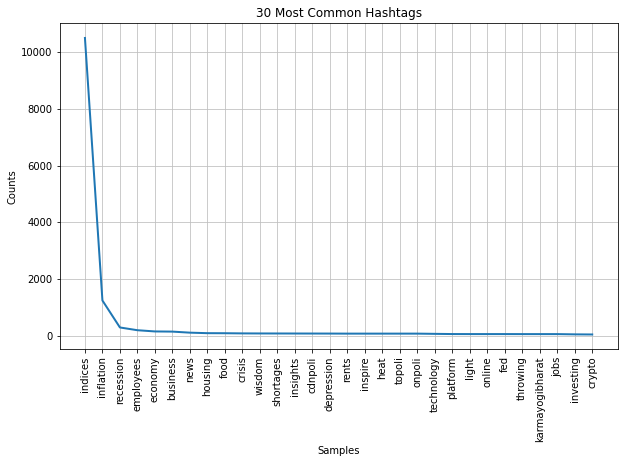

In [25]:
fig = plt.figure(figsize = (10,6))
fdist.plot(30, cumulative=False, title = '30 Most Common Hashtags')
plt.show()

# Exploratory Analysis
## Tweets Character Length

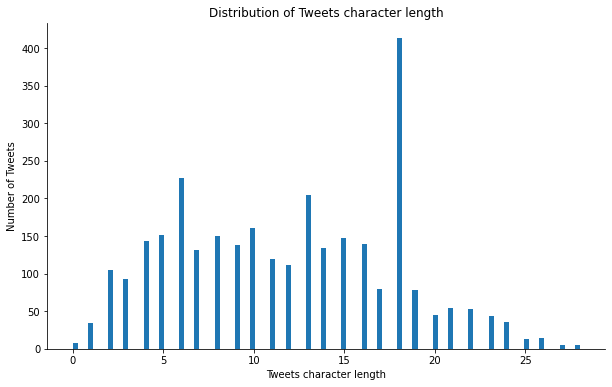

In [26]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in tweets_df_clean.text]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

# Wordcloud

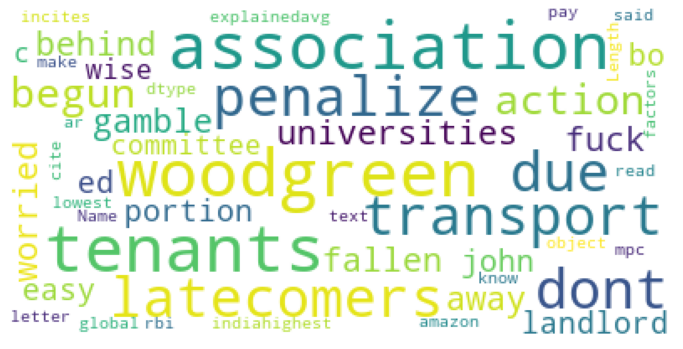

In [27]:
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color='white',
                      stopwords=stopwords,
                      max_words=500,
                      max_font_size=40, 
                      random_state=100
                      ).generate(str(tweets_df_clean.text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [28]:
# Flatten tweets
flat_list = [item for sublist in tweets_df_clean.text for item in sublist]

from sklearn.feature_extraction.text import CountVectorizer

# CountVectorize
vectorizer = CountVectorizer(
                            analyzer='word',       
                            min_df=3, # minimum required occurences of a word 
                            token_pattern='[a-zA-Z0-9]{3,}', # num chars > 3
                            max_features=5000, # max number of unique words
                            )
data_matrix = vectorizer.fit_transform(flat_list)

# The 10 most common words
sum_words = data_matrix.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:20]

[('wrong', 677),
 ('inflation', 401),
 ('still', 376),
 ('news', 368),
 ('talking', 355),
 ('sales', 347),
 ('say', 345),
 ('minutes', 342),
 ('retailers', 340),
 ('morning', 338),
 ('every', 338),
 ('store', 333),
 ('interviewed', 328),
 ('thru', 325),
 ('cruising', 324),
 ('preaching', 324),
 ('preached', 324),
 ('price', 162),
 ('year', 139),
 ('rate', 139)]

# Build The LDA Model

In [29]:
# Create a dictionary of tokens
id2word = Dictionary(list(tweets_df_clean["text"]))

# Create a corpus object. Term document frequency
corpus = [id2word.doc2bow(token) for token in tweets_df_clean["text"]]

# Base LDA model 
lda_model = LdaMulticore(
                          num_topics = 5, # Number of topics        
                          corpus = corpus,
                          id2word = id2word, 
                          random_state=20,      
                          passes = 10,
                          per_word_topics=True,
                          # iterations=100
                          )

In [30]:
# Print the Keyword in the 10 topics
print("Topics found via LDA:")
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

Topics found via LDA:
[(0,
  '0.012*"inflation" + 0.011*"pm" + 0.011*"called" + 0.010*"course" + '
  '0.010*"informed" + 0.010*"emphasized" + 0.010*"courses" + 0.010*"price" + '
  '0.009*"crisis" + 0.008*"us"'),
 (1,
  '0.011*"us" + 0.010*"yield" + 0.010*"inflation" + 0.008*"recession" + '
  '0.007*"today" + 0.007*"number" + 0.007*"coming" + 0.006*"inverted" + '
  '0.006*"lower" + 0.006*"soon"'),
 (2,
  '0.009*"expect" + 0.008*"says" + 0.007*"finance" + 0.006*"transparency" + '
  '0.006*"safety" + 0.006*"fairness" + 0.005*"people" + 0.005*"even" + '
  '0.005*"help" + 0.005*"involved"'),
 (3,
  '0.010*"inflation" + 0.009*"year" + 0.008*"recession" + 0.008*"next" + '
  '0.007*"friday" + 0.006*"global" + 0.006*"lowest" + 0.006*"prices" + '
  '0.006*"really" + 0.005*"rate"'),
 (4,
  '0.037*"wrong" + 0.022*"still" + 0.020*"say" + 0.020*"news" + '
  '0.020*"retailers" + 0.019*"sales" + 0.019*"store" + 0.019*"minutes" + '
  '0.019*"every" + 0.019*"talking"')]


In [31]:
# Visualize the topics
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.280362  0.016373       1        1  32.159179
3     -0.065662 -0.042248       2        1  21.818210
1     -0.058680 -0.173659       3        1  16.994705
2     -0.092401  0.168880       4        1  14.798917
0     -0.063619  0.030653       5        1  14.228990, topic_info=            Term        Freq       Total Category  logprob  loglift
41         wrong  442.000000  442.000000  Default  30.0000  30.0000
33     retailers  227.000000  227.000000  Default  29.0000  29.0000
35           say  236.000000  236.000000  Default  28.0000  28.0000
37         store  223.000000  223.000000  Default  27.0000  27.0000
27   interviewed  217.000000  217.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
802          fed   17.908669   40.938805   Topic5  -5.6600   1.1231
884         work   17.183581   39.439628   Topic5  -5.7013   1.1191
410         rate   20.766448  143.397694   Topic5  -5.5119   0.0176
115        today   18.379356   73.678751   Topic5  -5.6340   0.5614
207    financial   17.988553   62.190825   Topic5  -5.6555   0.7094

[298 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
488       2  0.796927        across
488       4  0.183906        across
2797      2  0.978556         added
1595      2  0.935329  alexstraszha
1191      1  0.975553       alleged
...     ...       ...           ...
139       1  0.993102         youre
4109      5  0.906491       youtube
1116      1  0.221310           yoy
1116      2  0.055327           yoy
1116      5  0.719256           yoy

[476 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 3, 1])

In [32]:
topic_list = []
count = 0
for i in lda_model[corpus]:
  # print('doc',count,i)
  topic_list.append(np.array([list(t) for t in zip(*i[0])])[1].argmax())
  count+=1



In [33]:
len(topic_list)

3038

In [35]:
df2['TOPICS']=topic_list

In [36]:
df2.head()

,text,TOPICS
0,"70,000 in the have begun action at 150 univers...",4
1,Worried about ? Fuck the . Gamble away a porti...,2
2,Woodgreen Tenants' Association: 's Landlord an...,4
3,Woodgreen Tenants' Association: -Ed: John Tory...,3
4,Woodgreen Tenants' Association: COMMITTEE CORN...,3


# Selecting the best number of topics (K)
k=4

In [37]:
# Create a dictionary of tokens
id2word = Dictionary(list(tweets_df_clean["text"]))

# Create a corpus object. Term document frequency
corpus = [id2word.doc2bow(token) for token in tweets_df_clean["text"]]

# Base LDA model 
lda_model_2 = LdaMulticore(
                          num_topics = 4, # Number of topics        
                          corpus = corpus,
                          id2word = id2word, 
                          random_state=20,      
                          passes = 10,
                          per_word_topics=True
                          )

In [38]:
# Print the Keyword in the 4 topics
print("Topics found via LDA:")
pprint(lda_model_2.print_topics())
doc_lda = lda_model_2[corpus]

Topics found via LDA:
[(0,
  '0.019*"inflation" + 0.010*"u" + 0.009*"rate" + 0.008*"year" + '
  '0.007*"market" + 0.006*"expect" + 0.006*"finance" + 0.005*"price" + '
  '0.005*"recession" + 0.005*"friday"'),
 (1,
  '0.015*"price" + 0.010*"week" + 0.010*"inflation" + 0.007*"increase" + '
  '0.006*"market" + 0.006*"going" + 0.006*"policy" + 0.006*"employee" + '
  '0.005*"time" + 0.005*"rate"'),
 (2,
  '0.009*"u" + 0.008*"yield" + 0.008*"people" + 0.008*"recession" + '
  '0.007*"inflation" + 0.007*"crisis" + 0.007*"economic" + 0.007*"new" + '
  '0.006*"today" + 0.006*"money"'),
 (3,
  '0.038*"wrong" + 0.025*"say" + 0.022*"talking" + 0.021*"sale" + '
  '0.021*"minute" + 0.021*"news" + 0.021*"retailer" + 0.020*"every" + '
  '0.020*"still" + 0.020*"morning"')]


K=5

In [39]:
# Create a dictionary of tokens
id2word = Dictionary(list(tweets_df_clean["text"]))

# Create a corpus object. Term document frequency
corpus = [id2word.doc2bow(token) for token in tweets_df_clean["text"]]

# Base LDA model 
lda_model_2 = LdaMulticore(
                          num_topics = 5, # Number of topics          
                          corpus = corpus,
                          id2word = id2word, 
                          random_state=20,      
                          passes = 10,
                          per_word_topics=True
                          )
# Print the Keyword in the 5 topics
print("Topics found via LDA:")
pprint(lda_model_2.print_topics())
doc_lda = lda_model_2[corpus]

Topics found via LDA:
[(0,
  '0.019*"inflation" + 0.011*"u" + 0.007*"market" + 0.007*"lowest" + '
  '0.007*"rate" + 0.006*"year" + 0.006*"lower" + 0.006*"dont" + 0.005*"friday" '
  '+ 0.005*"stock"'),
 (1,
  '0.019*"price" + 0.010*"inflation" + 0.007*"increase" + 0.007*"week" + '
  '0.007*"year" + 0.007*"association" + 0.007*"woodgreen" + 0.007*"tenant" + '
  '0.006*"get" + 0.005*"since"'),
 (2,
  '0.010*"u" + 0.010*"people" + 0.010*"money" + 0.010*"yield" + 0.008*"crisis" '
  '+ 0.008*"inflation" + 0.008*"recession" + 0.007*"economic" + 0.007*"coming" '
  '+ 0.007*"today"'),
 (3,
  '0.044*"wrong" + 0.027*"say" + 0.026*"talking" + 0.025*"news" + '
  '0.024*"still" + 0.024*"sale" + 0.024*"minute" + 0.024*"retailer" + '
  '0.023*"every" + 0.023*"store"'),
 (4,
  '0.018*"rate" + 0.011*"year" + 0.010*"inflation" + 0.009*"next" + '
  '0.009*"week" + 0.008*"hike" + 0.007*"recession" + 0.007*"market" + '
  '0.005*"take" + 0.005*"u"')]


k=6

In [40]:
# Create a dictionary of tokens
id2word = Dictionary(list(tweets_df_clean["text"]))

# Create a corpus object. Term document frequency
corpus = [id2word.doc2bow(token) for token in tweets_df_clean["text"]]

# Base LDA model 
lda_model_2 = LdaMulticore(
                          num_topics = 6, # Number of topics         
                          corpus = corpus,
                          id2word = id2word, 
                          random_state=20,      
                          passes = 10,
                          per_word_topics=True
                          )
# Print the Keyword in the 6 topics
print("Topics found via LDA:")
pprint(lda_model_2.print_topics())
doc_lda = lda_model_2[corpus]

Topics found via LDA:
[(0,
  '0.021*"inflation" + 0.013*"u" + 0.009*"finance" + 0.009*"expect" + '
  '0.007*"transparency" + 0.007*"safety" + 0.007*"lower" + 0.007*"price" + '
  '0.007*"fairness" + 0.007*"year"'),
 (1,
  '0.013*"price" + 0.009*"association" + 0.009*"woodgreen" + 0.009*"tenant" + '
  '0.008*"inflation" + 0.007*"employee" + 0.007*"help" + 0.006*"year" + '
  '0.006*"policy" + 0.006*"get"'),
 (2,
  '0.012*"yield" + 0.012*"u" + 0.010*"recession" + 0.009*"people" + '
  '0.008*"today" + 0.007*"coming" + 0.007*"risk" + 0.006*"soon" + '
  '0.006*"curve" + 0.006*"inverted"'),
 (3,
  '0.049*"wrong" + 0.030*"say" + 0.028*"talking" + 0.027*"minute" + '
  '0.026*"sale" + 0.026*"retailer" + 0.026*"news" + 0.026*"every" + '
  '0.025*"still" + 0.025*"store"'),
 (4,
  '0.019*"rate" + 0.012*"year" + 0.011*"next" + 0.009*"week" + '
  '0.008*"inflation" + 0.008*"hike" + 0.007*"recession" + 0.007*"new" + '
  '0.006*"take" + 0.006*"example"'),
 (5,
  '0.015*"inflation" + 0.011*"money" + 0.01

In [50]:
topic_n = []
perplexity = []

coherence = []
for k in range(2,15):
  # Create a dictionary of tokens
  id2word = Dictionary(list(tweets_df_clean["text"]))

  # Create a corpus object. Term document frequency
  corpus = [id2word.doc2bow(token) for token in tweets_df_clean["text"]]

  # Base LDA model 
  lda_model_2 = LdaMulticore(
                            num_topics = k, # Number of topics          
                            corpus = corpus,
                            id2word = id2word, 
                            random_state=20,      
                            passes = 10,
                            per_word_topics=True
                            )
  # Print the Keyword in the K topics
  print("Topics found via LDA:",k)
  pprint(lda_model_2.print_topics())
  doc_lda = lda_model_2[corpus]

  # Compute Perplexity 
  base_perplexity = lda_model_2.log_perplexity(corpus)
  print("\nPerplexity: ", base_perplexity)

  # Compute Coherence Score
  coherence_model = CoherenceModel(model = lda_model_2, texts = tweets_df_clean["text"],
                                  coherence = "c_v")
  coherence_lda_model_base = coherence_model.get_coherence()
  print("\nCoherence Score: ", coherence_lda_model_base)


  perplexity.append(base_perplexity)
  coherence.append(coherence_lda_model_base)

Topics found via LDA: 2
[(0,
  '0.013*"inflation" + 0.010*"u" + 0.009*"year" + 0.009*"rate" + '
  '0.007*"course" + 0.006*"recession" + 0.005*"coming" + 0.005*"today" + '
  '0.005*"price" + 0.004*"yield"'),
 (1,
  '0.019*"wrong" + 0.013*"say" + 0.012*"news" + 0.011*"talking" + '
  '0.011*"still" + 0.010*"sale" + 0.010*"morning" + 0.010*"store" + '
  '0.010*"every" + 0.010*"retailer"')]

Perplexity:  -7.366794348610305

Coherence Score:  0.5364390892965566
Topics found via LDA: 3
[(0,
  '0.016*"inflation" + 0.012*"course" + 0.008*"u" + 0.008*"rate" + '
  '0.007*"year" + 0.006*"informed" + 0.006*"called" + 0.006*"sh" + '
  '0.006*"emphasized" + 0.006*"pm"'),
 (1,
  '0.029*"wrong" + 0.019*"say" + 0.016*"talking" + 0.016*"sale" + '
  '0.015*"still" + 0.015*"news" + 0.015*"morning" + 0.015*"every" + '
  '0.015*"retailer" + 0.015*"store"'),
 (2,
  '0.008*"year" + 0.008*"u" + 0.007*"recession" + 0.007*"new" + '
  '0.006*"inflation" + 0.006*"people" + 0.006*"market" + 0.006*"money" + '
  '0.00

In [83]:
# data preprocessing / data cleaning
import re
import string

def clean_text(text):
    ''', , and '''
#Make text lowercase   
    text = text.lower()
#remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)
#remove punctuation   
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
#remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
#remove links   
    text = re.sub(r'http\S+', '', text)
#remove emojis    
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text = regrex_pattern.sub(r'', text)
    return text
tweetsdf = pd.DataFrame(df.text.apply(lambda x: clean_text(x)))

In [84]:
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(
analyzer='word',       
min_df=3,# minimum required occurences of a word 
stop_words='english',# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix = vectorizer.fit_transform(tweetsdf.text)
data_matrix

<5000x4102 sparse matrix of type '<class 'numpy.int64'>'
	with 70971 stored elements in Compressed Sparse Row format>

In [85]:
# I will use LDA to create topics along with the probability distribution for each word in our vocabulary for each topic
lda_model = LatentDirichletAllocation(
n_components=10, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_matrix)

In [86]:
import pyLDAvis
import pyLDAvis.sklearn
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [87]:
#pyLDAvis extracts information from a fitted LDA topic model to inform an interactive web-based visualization
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  16.716631
5       0.648955  71.707100       2        1  11.772762
3      71.019684   9.971006       3        1  11.517056
4       3.785981  33.185135       4        1  10.099809
6     -42.666500  -9.222070       5        1  10.024688
2      -3.621689 -43.526516       6        1   9.312023
8      -3.632402  -4.171708       7        1   9.147413
7     -36.584400  35.804413       8        1   8.092328
1      44.391380  50.615383       9        1   7.934356
9      40.235809 -31.591665      10        1   5.382935, topic_info=           Term         Freq        Total Category  logprob  loglift
1132  employees   736.000000   736.000000  Default  30.0000  30.0000
4063      wrong   626.000000   626.000000  Default  29.0000  29.0000
2419        msm   590.000000   590.000000  Default  28.0000  28.0000
2971  recession  1156.000000  1156.000000  Default  27.0000  27.0000
771      crisis   329.000000   329.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1727       home    28.817655    47.363617  Topic10  -4.9631   2.4251
1077    economy    47.894839   518.036092  Topic10  -4.4551   0.5409
1084     edtech    23.457061    29.810290  Topic10  -5.1690   2.6823
161     article    23.250004    40.194684  Topic10  -5.1778   2.3745
1389     follow    23.077251    44.517596  Topic10  -5.1853   2.2649

[459 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
65        4  0.984361           agents
73        4  0.969935            ahead
76       10  0.980820            aimed
93       10  0.980813  alexandreeruimy
94        6  0.987797     alexstraszha
...     ...       ...              ...
4078      4  0.296946            years
4078      7  0.438349            years
4078      8  0.120192            years
4082      1  0.991787            yield
4090      9  0.971757          youtube

[543 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 4, 5, 7, 3, 9, 8, 2, 10])

In [88]:
#  top 10 most frequent words from each topic that found by LDA
warnings.filterwarnings("ignore", category=DeprecationWarning)
for i,topic in enumerate(lda_model.components_):
    print('Top 10 words for topic:',i)
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Top 10 words for topic: 0
['gold', 'rate', 'market', 'markets', 'finance', 'investing', 'fed', 'economy', 'inflation', 'recession']


Top 10 words for topic: 1
['lower', 'officials', 'called', 'online', 'december', 'light', 'work', 'technology', 'govt', 'employees']


Top 10 words for topic: 2
['latest', 'high', 'recession', 'love', 'really', 'end', 'rising', 'india', 'read', 'inflation']


Top 10 words for topic: 3
['morning', 'sales', 'news', 'say', 'minutes', 'just', 'like', 'msm', 'wrong', 'inflation']


Top 10 words for topic: 4
['today', 'thelayoff', 'friday', 'cost', 'year', 'layoff', 'jobs', 'recession', 'layoffs', 'inflation']


Top 10 words for topic: 5
['says', 'biden', 'turkey', 'big', 'wage', 'income', 'new', 'thanksgiving', 'amp', 'inflation']


Top 10 words for topic: 6
['business', 'world', 'central', 'people', 'corruption', 'rate', 'policy', 'war', 'money', 'inflation']


Top 10 words for topic: 7
['shortages', 'tenants', 'insights', 'cdnpoli', 'news', 'business', 'hou

In [89]:
len(lda_model.transform(data_matrix).argmax(axis=1))

array([8, 7, 7, ..., 1, 9, 9])